인공신경망 개념

출력층에서 사용
* 다중분류: softmax (주로 출력층)
* 이진분류: sigmoid (주로 중간층)

활성화 함수: 인공신경망에서 쓰는 뉴런의 출력값을 결정하는 모든 함수

은닉층에서 사용
* Tanh(얕은 네트워크)
* ReLU(딥 네트워크)
* Leaky ReLU(딥 네트워크)

심층신경망

범위별: 머신러닝>신경망>심층신경망>딥러닝

* 머신러닝: 예)선형회귀
* 신경망: 예) 입력층-은닉층-출력층(머신러닝 알고리즘을 구현한 다양한 신경망 존재)
* 심층신경망: 예)입력층-은닉1-은닉2-출력층 은닉2부터 심층이라봄. 과적합, 속도저하, 기울기 소실 문제 있음. 이를 해결하기 위한 다양한 기법 등장.
* 딥러닝: 심층신경망 기반. 머신러닝 하위 분야. 특성 자동 추출

퍼셉트론(AI 기반 개념)
* 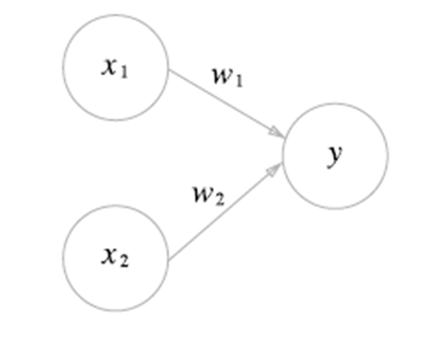

* 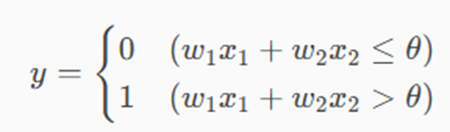

세타값을 잘 찾는게 중요

컴퓨터의 기본이 플립플로우인 것 처럼 AI의 기본이 퍼셉트론

퍼셉트론의 모든 회로를 만들수 있음

퍼셉트론과 딥러닝의 차이: 바이오스의 존재
* 퍼셉트론: wx>세타, y=1
* 딥러닝: wx+b>세타, y=1

In [5]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1,28*28)

#print(train_target[:10])

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)
inputs = keras.Input(shape=(784,))
dense = keras.layers.Dense(10,activation='softmax')
model = keras.Sequential([inputs,dense]) #순차적인 기본 모델
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy']) #정확도를 평가지표로 사용
#엔트로피는 혼잡도. 모든건 엔트로피가 증가하는 방향으로 가려한다는 전제
#categorical_crossenropy: 다중분류 교차검증 손실함수
#sparse가 앞에 붙으면: 레이블이 정수 인덱스 사용.
#spaese가 없다면: 레이블이 벡터 형태(범주형->수치형 데이터로 변환한 것:원-핫 인코딩. 단순 숫자가 아니라 벡터로 표현하는 것)
#AI가 범주를 수치로 오해할수 있기 때문. 예) 1,2,3 -> [1,0,0], [0,1,0],[0,0,1]

model.fit(train_scaled,train_target,epochs=5)
model.evaluate(val_scaled,val_target)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7434 - loss: 0.7716
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8365 - loss: 0.4806
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8479 - loss: 0.4543
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8503 - loss: 0.4392
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8522 - loss: 0.4336
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8506 - loss: 0.4401


[0.4487750232219696, 0.8492500185966492]